        SKU Category  Beginning_Inventory        LMIL        UMIL
count    32       32            30.000000   30.000000   30.000000
unique   11        4                  NaN         NaN         NaN
top      p1      NDS                  NaN         NaN         NaN
freq      3       14                  NaN         NaN         NaN
mean    NaN      NaN            77.700000   46.500000  105.066667
std     NaN      NaN            32.361269   17.832071   22.408332
min     NaN      NaN            23.000000   19.000000   61.000000
25%     NaN      NaN            56.500000   38.500000   88.500000
50%     NaN      NaN            72.500000   45.500000  106.000000
75%     NaN      NaN            92.500000   56.250000  119.750000
max     NaN      NaN           154.000000  104.000000  138.000000


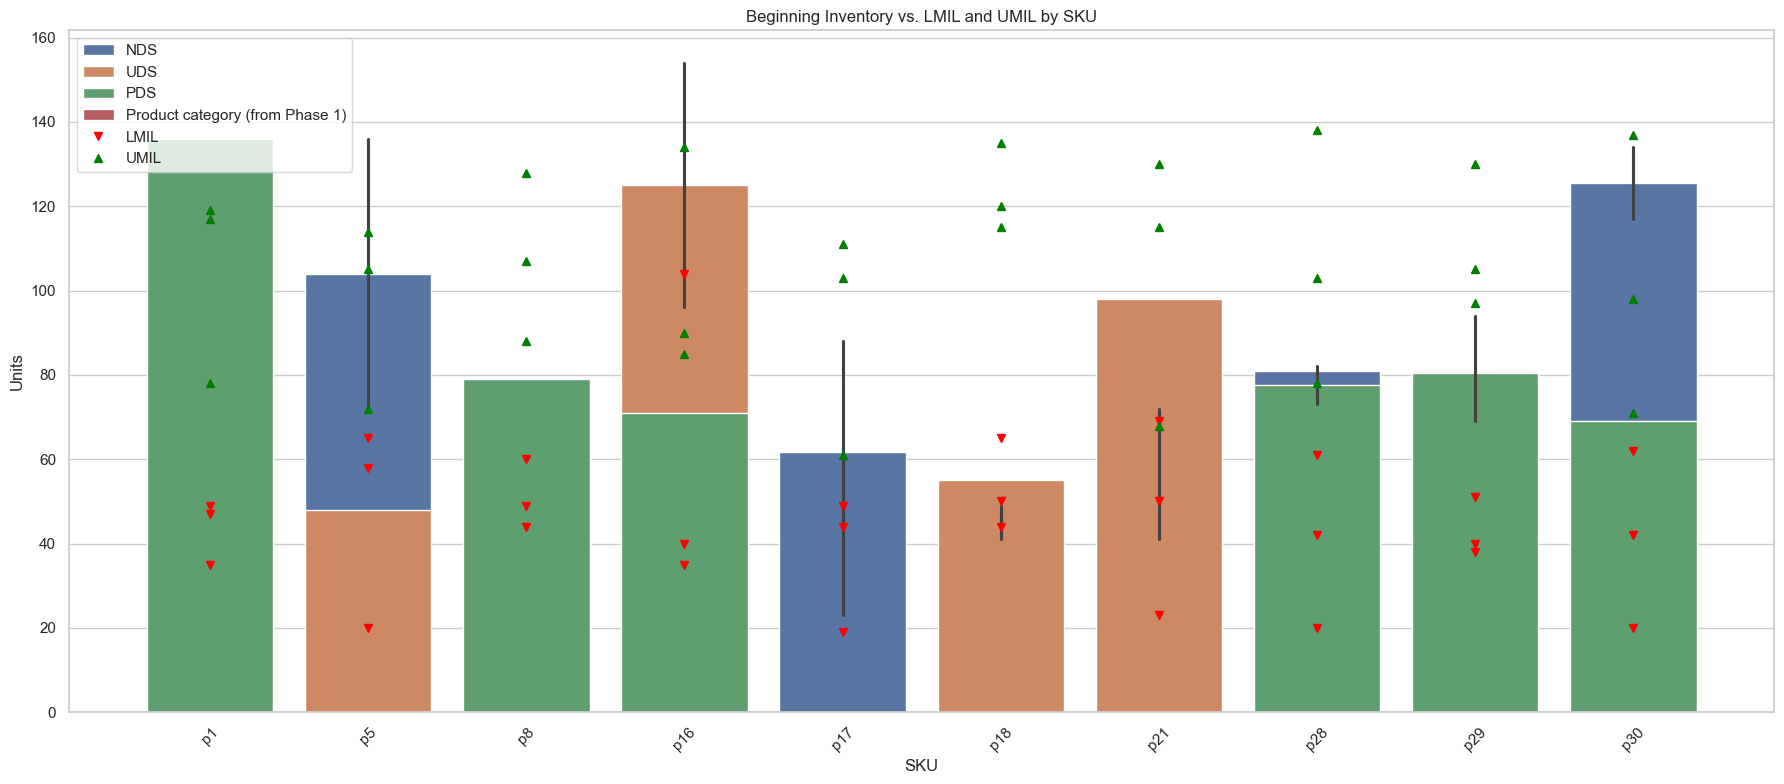

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file
file_path = "Model Sample Data - Retail Inventory.xlsx"
df = pd.read_excel(file_path)

# Rename columns for clarity
df = df.rename(columns={
    "Product": "SKU",
    "Beginning Inventory (Bipi, pc)": "Beginning_Inventory",
    "Lower Maintaining Inventory Level (LMILpi, pc)": "LMIL",
    "Upper Maintaining Inventory Level (UMILpi, pc)": "UMIL",
    "Product category (from Phase 1)": "Category"
})

# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop null or removed products if necessary
df = df[df["SKU"].notnull()]
df = df[df["Beginning_Inventory"].notnull()]

# Convert to numeric
df["Beginning_Inventory"] = pd.to_numeric(df["Beginning_Inventory"], errors="coerce")
df["LMIL"] = pd.to_numeric(df["LMIL"], errors="coerce")
df["UMIL"] = pd.to_numeric(df["UMIL"], errors="coerce")

# 📊 Summary Stats
print(df[["SKU", "Category", "Beginning_Inventory", "LMIL", "UMIL"]].describe(include='all'))

# 📉 Plot
plt.figure(figsize=(18, 8))
sns.barplot(data=df, x='SKU', y='Beginning_Inventory', hue='Category', dodge=False)
plt.plot(df['SKU'], df['LMIL'], 'v', color='red', label='LMIL')
plt.plot(df['SKU'], df['UMIL'], '^', color='green', label='UMIL')
plt.title('Beginning Inventory vs. LMIL and UMIL by SKU')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
